#### Part 7 Remove Dropout from CNN and train it again



In [1]:
import numpy as np
import keras
from keras.datasets import mnist 
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
def resizing(mnist):
     train_data = []
     for img in mnist:
            resized_img = cv2.resize(img, (32, 32))
            train_data.append(resized_img)
     return train_data
newX_train = np.array(resizing(X_train))
newX_test = np.array(resizing(X_test))

In [3]:
from keras import backend
if keras.backend.image_data_format() == 'channels_first':
  newX_train = newX_train.reshape(len(newX_train), 1, 32, 32)
  newX_test = newX_test.reshape(len(newX_test), 1, 32, 32)
  input_shape = (1, 32, 32)
else:
  newX_train = newX_train.reshape(len(newX_train), 32, 32, 1)
  newX_test = newX_test.reshape(len(newX_test), 32, 32, 1)
  input_shape = (32, 32, 1)

In [4]:
from keras.utils import np_utils
newX_train = newX_train.astype('float32')
newX_train /= 255
newX_test = newX_test.astype('float32')
newX_test /= 255
Y_train = keras.utils.np_utils.to_categorical(Y_train, 10)
Y_test = keras.utils.np_utils.to_categorical(Y_test, 10)

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten 
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
model.add(Flatten()) 
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 256)         5

In [6]:
from tensorflow.keras.optimizers import SGD
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [10]:
history = model.fit(newX_train[:6000], Y_train[:6000], batch_size=32, validation_data=(newX_test[:1000],Y_test[:1000]), epochs=10, verbose=1)
model.evaluate(newX_test[:1000], Y_test[:1000], batch_size=32)

Epoch 1/10
188/188 [==============================] - 418s 2s/step - loss: 2.2885 - accuracy: 0.1712 - val_loss: 2.2222 - val_accuracy: 0.2330
Epoch 2/10
188/188 [==============================] - 414s 2s/step - loss: 1.0057 - accuracy: 0.6580 - val_loss: 0.3934 - val_accuracy: 0.8770
Epoch 3/10
188/188 [==============================] - 416s 2s/step - loss: 0.2322 - accuracy: 0.9302 - val_loss: 0.2101 - val_accuracy: 0.9340
Epoch 4/10
188/188 [==============================] - 414s 2s/step - loss: 0.1341 - accuracy: 0.9620 - val_loss: 0.2214 - val_accuracy: 0.9380
Epoch 5/10
188/188 [==============================] - 416s 2s/step - loss: 0.0965 - accuracy: 0.9713 - val_loss: 0.1294 - val_accuracy: 0.9590
Epoch 6/10
188/188 [==============================] - 418s 2s/step - loss: 0.0748 - accuracy: 0.9775 - val_loss: 0.1130 - val_accuracy: 0.9650
Epoch 7/10
188/188 [==============================] - 422s 2s/step - loss: 0.0468 - accuracy: 0.9855 - val_loss: 0.1897 - val_accuracy: 0.9490

In [12]:
model.evaluate(newX_test[:1000], Y_test[:1000], batch_size=32)

32/32 [==============================] - 7s 207ms/step - loss: 0.1432 - accuracy: 0.9620


[0.14315731823444366, 0.9620000123977661]

#### Inspect the training process

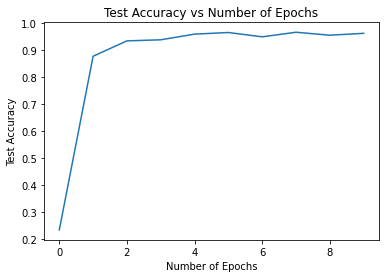

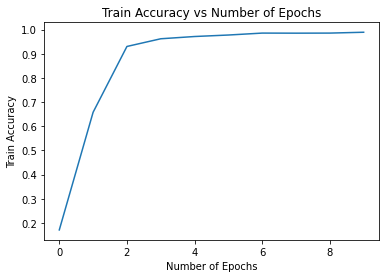

In [11]:
# (i) test accuracy vs the number of epochs (say 3 ∼ 5)
plt.plot(history.history['val_accuracy'])
plt.title('Test Accuracy vs Number of Epochs')
plt.ylabel('Test Accuracy')
plt.xlabel('Number of Epochs')
plt.show()
# (ii) training accuracy vs the number of epochs
plt.plot(history.history['accuracy'])
plt.title('Train Accuracy vs Number of Epochs')
plt.ylabel('Train Accuracy')
plt.xlabel('Number of Epochs')
plt.show()

##### Conclusion: After removing the Dropouts, the results were not affected very much and accuracies became a bit higher. Since Dropouts reduce model capacity, by removing them, the model performs better. 

In [14]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('A3E1_7.ipynb')

File ‘colab_pdf.py’ already there; not retrieving.





Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/A3E1_7.ipynb to pdf
[NbConvertApp] Support files will be in A3E1_7_files/
[NbConvertApp] Making directory ./A3E1_7_files
[NbConvertApp] Making directory ./A3E1_7_files
[NbConvertApp] Writing 41017 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: [u'bibtex', u'./notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 54561 bytes to /content/drive/My Drive/A3E1_7.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'